# **IMAGE CLASSIFICATION USING CIFAR-10 DATASET: A COMPARISON OF MANHATTAN (L1) AND EUCLIDEAN (L2) DISTANCES WITH 5-FOLD CROSS-VALIDATION**

**Dataset & Preprocessing**

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/CVPR/animals'

In [4]:
# Load data
catagories = os.listdir(data_path)
print(catagories)

['animals', 'images', 'dogs', 'cats', 'panda']


In [5]:
train_data = []

for c in catagories:
  path = os.path.join(data_path,c)
  label = catagories.index(c)
  for img in tqdm(os.listdir(path)):
    try:
      img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      img_arr = cv2.resize(img_arr,(32,32))
      train_data.append([img_arr , label])
    except Exception as e:
      pass

print(len(train_data))

100%|██████████| 3/3 [00:00<00:00,  3.18it/s]
0it [00:00, ?it/s]
100%|██████████| 1000/1000 [00:33<00:00, 29.84it/s]

3000


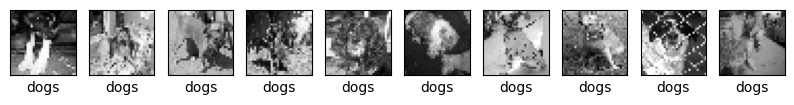

In [6]:
plt.figure(figsize=(10,3))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(train_data[i][0], cmap='gray')
  plt.xlabel(catagories[train_data[i][1]])
  plt.xticks([])
  plt.yticks([])
plt.show()

In [7]:
random.shuffle(train_data)

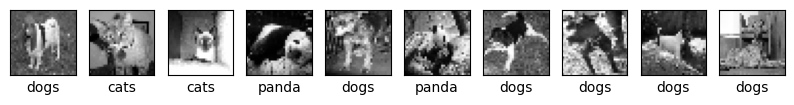

In [8]:
plt.figure(figsize=(10,3))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(train_data[i][0], cmap='gray')
  plt.xlabel(catagories[train_data[i][1]])
  plt.xticks([])
  plt.yticks([])
plt.show()

**Building Model & Evaluating**

In [9]:
# Create folds
f1 = train_data[0:600]
f2 = train_data[600:1200]
f3 = train_data[1200:1800]
f4 = train_data[1800:2400]
f5 = train_data[2400:3000]
print(len(f1), len(f2), len(f3), len(f4), len(f5))

600 600 600 600 600


In [10]:
train_set= f1+f2+f3+f4
validation_set = f5
print(len(train_set),len(validation_set))

2400 600


In [11]:
# get image and labels from the train and validation sets
X_train = np.array([x[0].flatten() for x in train_set])  # Flatten the 32x32 image into a 1D vector
y_train = np.array([x[1] for x in train_set]) # Get the labels of the training set

X_val = np.array([x[0].flatten() for x in validation_set]) # Flatten convert multi-dimensional array into 1D array
y_val = np.array([x[1] for x in validation_set])

In [12]:
# Manhattan (L1) distance function
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2)) # Calculate the Manhattan (L1) distance between two vectors

# Euclidean (L2) distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [13]:
# k-NN classifier function
def knn_predict(X_train, y_train, X_test, k, distance_fn):
    predictions = []  # List to store predictions
    for test_sample in X_test:
        # Calculate the distances between the test sample and all training samples
        distances = [distance_fn(train_sample, test_sample) for train_sample in X_train]

        # Get the indices of the k nearest neighbors
        k_nearest_indices = np.argsort(distances)[:k]

        # Get the labels of the k nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_nearest_indices]

        # Predict the majority label (vote)
        predicted_label = max(set(k_nearest_labels), key=k_nearest_labels.count)
        predictions.append(predicted_label) # Append the predicted label to the predictions list
    return np.array(predictions)  # Return the predictions as a numpy array

In [14]:
# Function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true) # Return the percentage of correct predictions

# Define a range of k values to evaluate
k_values = range(1, 21)  # Testing k from 1 to 20
accuracies_manhattan = [] # List to store accuracy for Manhattan distance
accuracies_euclidean = []

In [15]:
# Loop through each k value and compute accuracy
for k in k_values:
    y_pred_manhattan = knn_predict(X_train, y_train, X_val, k, manhattan_distance)  # Predict using Manhattan distance
    accuracy_manhattan = calculate_accuracy(y_val, y_pred_manhattan) # Calculate accuracy for Manhattan distance
    accuracies_manhattan.append(accuracy_manhattan) # Store the accuracy in the list


    y_pred_euclidean = knn_predict(X_train, y_train, X_val, k, euclidean_distance)
    accuracy_euclidean = calculate_accuracy(y_val, y_pred_euclidean)
    accuracies_euclidean.append(accuracy_euclidean)

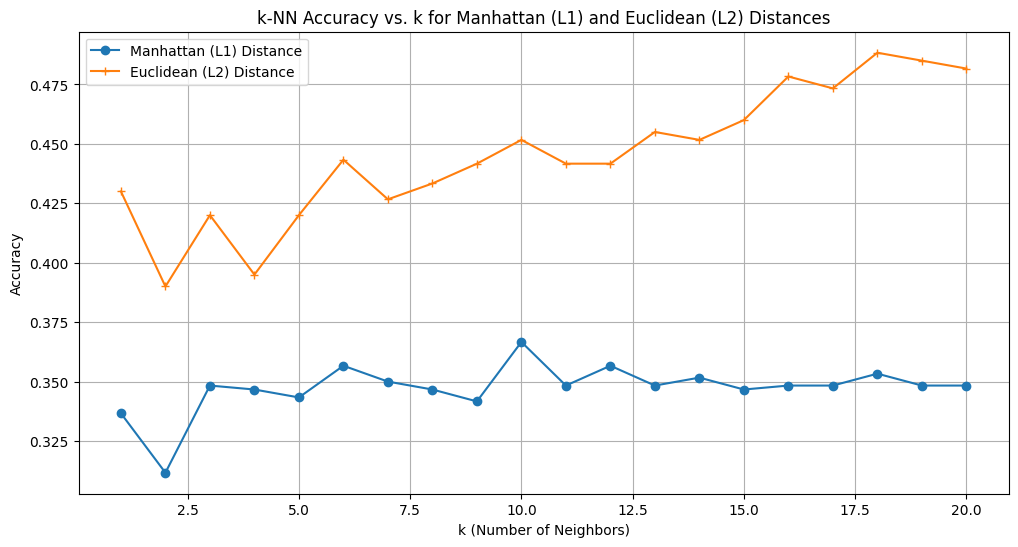

In [16]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies_manhattan, label='Manhattan (L1) Distance', marker='o') # Plot Manhattan accuracy
plt.plot(k_values, accuracies_euclidean, label='Euclidean (L2) Distance', marker='+') # Plot Euclidean accuracy
plt.xlabel('k (Number of Neighbors)')  # Set the x-axis label
plt.ylabel('Accuracy') # Set the y-axis label
plt.title('k-NN Accuracy vs. k for Manhattan (L1) and Euclidean (L2) Distances') # Set the title
plt.legend()
plt.grid(True)
plt.show()

# **Discussion**

**Comparison of Manhattan (L1) and Euclidean (L2) Performance:**



*   L1 (Manhattan Distance): Exhibited lower accuracy compared to L2 and showed instability in results.
*   L2 (Euclidean Distance): Achieved higher and more stable accuracy than L1.


**Dataset Characteristics:**


*   Training images were converted to grayscale.



**Feature Behavior:**


*   L1 showed more instability than L2.
*   Grayscale conversion reduced the data's dimensionality.




**Limitations & Potential Improvements:**


*   Testing with a wider range of k-values could enhance performance.
*   Combining L1 and L2 distances might lead to better results.








**Top 5 Predictions**

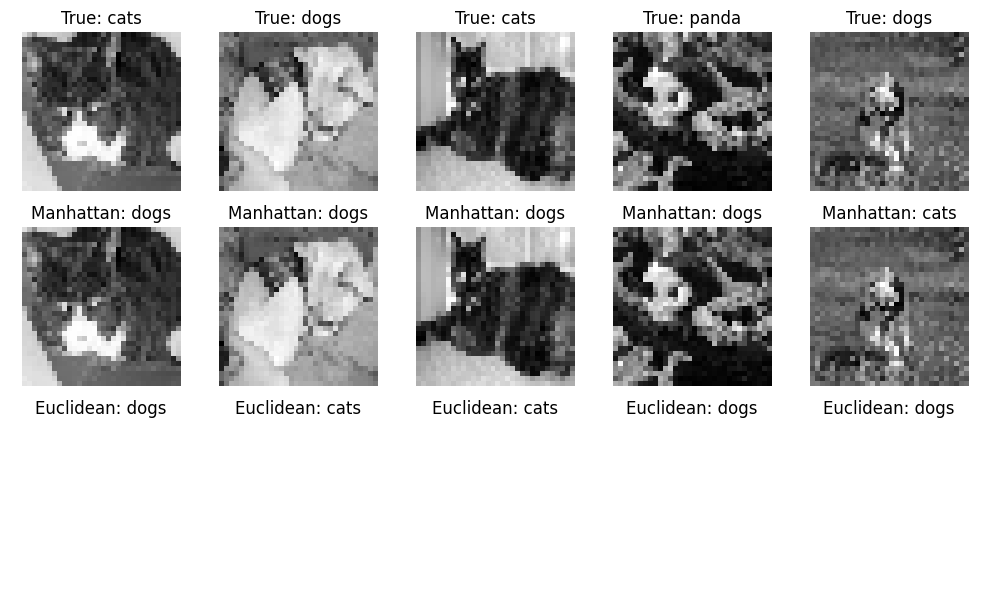

In [17]:
# Select the first 5 test images and their true labels from the validation set
test_images = X_val[:5]
true_labels = y_val[:5]

# Set k for predictions
k = 5

# Predict labels using both Manhattan and Euclidean distances
pred_manhattan = knn_predict(X_train, y_train, test_images, k, manhattan_distance)
pred_euclidean = knn_predict(X_train, y_train, test_images, k, euclidean_distance)

# Plot the test images along with their true and predicted labels
plt.figure(figsize=(10, 6))

for i in range(5):
    # Show the test image with true label
    plt.subplot(3, 5, i + 1)
    img = test_images[i].reshape(32, 32)  # Reshape to 32x32
    plt.imshow(img, cmap='gray')
    plt.title(f'True: {catagories[true_labels[i]]}')
    plt.axis('off')

    # Show the predicted label using Manhattan distance
    plt.subplot(3, 5, i + 6)
    plt.imshow(img, cmap='gray')
    plt.title(f'Manhattan: {catagories[pred_manhattan[i]]}')
    plt.axis('off')

    # Show the predicted label using Euclidean distance
    plt.subplot(3, 5, i + 11)
    plt.title(f'Euclidean: {catagories[pred_euclidean[i]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()